In [1]:
import xgboost as xgb
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime

In [2]:
data = load_boston()
# 波士顿数据集非常简单，但它所涉及到的问题却很多
X = data.data
y = data.target

In [3]:
Xtrain, Xtest, Ytrain, Ytest = TTS(X, y, test_size=0.3, random_state=420)

## 过拟合：剪枝参数与回归模型调参

In [4]:
dfull = xgb.DMatrix(X, y)

param1 = {'objective': 'reg:squarederror',
          'subsample': 1,
          'max_depth': 6,
          'eta': 0.3,
          'gamma': 0,
          'lambda': 1,
          'alpha': 0,
          "colsample_bytree": 1,
          "colsample_bylevel": 1,
          "colsample_bynode": 1}
num_round = 200

00:00:423922


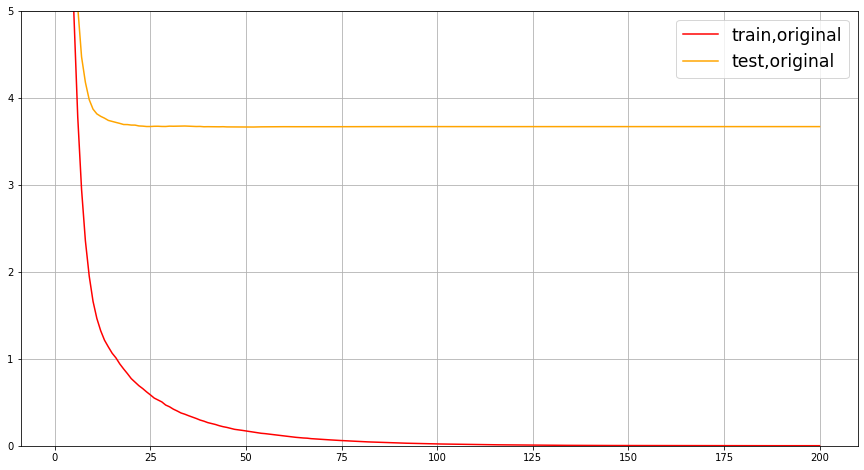

In [5]:
time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round, nfold=5)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

fig, ax = plt.subplots(1, figsize=(15, 8))
ax.set_ylim(top=5)
ax.grid()
ax.plot(range(1, 201), cvresult1.iloc[:, 0], c="red", label="train,original")
ax.plot(range(1, 201), cvresult1.iloc[:, 2], c="orange", label="test,original")
ax.legend(fontsize="xx-large")
plt.show()

00:00:391602
00:00:158361
00:00:272349


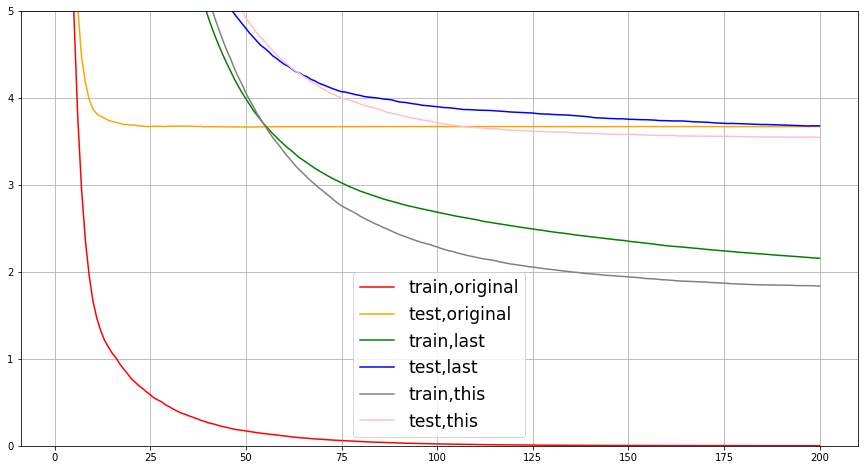

In [6]:
param1 = {'objective': 'reg:squarederror',
          "subsample": 1,
          "max_depth": 6,
          "eta": 0.3,
          "gamma": 0,
          "lambda": 1,
          "alpha": 0,
          "colsample_bytree": 1,
          "colsample_bylevel": 1,
          "colsample_bynode": 1}
num_round = 200

time0 = time()
cvresult1 = xgb.cv(param1, dfull, num_round, nfold=5)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

fig, ax = plt.subplots(1, figsize=(15, 8))
ax.set_ylim(top=5)
ax.grid()
ax.plot(range(1, 201), cvresult1.iloc[:, 0], c="red", label="train,original")
ax.plot(range(1, 201), cvresult1.iloc[:, 2], c="orange", label="test,original")

param2 = {'objective': 'reg:squarederror',
          "max_depth": 2,
          "eta": 0.05,
          "gamma": 0,
          "lambda": 1,
          "alpha": 0,
          "colsample_bytree": 1,
          "colsample_bylevel": 0.4,
          "colsample_bynode": 1}

param3 = {'objective': 'reg:squarederror',
          "subsample": 1,
          "eta": 0.05,
          "gamma": 20,
          "lambda": 3.5,
          "alpha": 0.2,
          "max_depth": 4,
          "colsample_bytree": 0.4,
          "colsample_bylevel": 0.6,
          "colsample_bynode": 1}

time0 = time()
cvresult2 = xgb.cv(param2, dfull, num_round, nfold=5)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

time0 = time()
cvresult3 = xgb.cv(param3, dfull, num_round, nfold=5)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

ax.plot(range(1, 201), cvresult2.iloc[:, 0], c="green", label="train,last")
ax.plot(range(1, 201), cvresult2.iloc[:, 2], c="blue", label="test,last")
ax.plot(range(1, 201), cvresult3.iloc[:, 0], c="gray", label="train,this")
ax.plot(range(1, 201), cvresult3.iloc[:, 2], c="pink", label="test,this")
ax.legend(fontsize="xx-large")
plt.show()

## XGBoost模型的保存和调用

### 使用Pickle保存和调用模型

import pickle

In [19]:
dtrain = xgb.DMatrix(Xtrain, Ytrain)

# 设定参数，对模型进行训练
param = {'objective': 'reg:squarederror', 
         "subsample": 1, 
         "eta": 0.05, 
         "gamma": 20, 
         "lambda": 3.5, 
         "alpha": 0.2,
         "max_depth": 4, 
         "colsample_bytree": 0.4, 
         "colsample_bylevel": 0.6, 
         "colsample_bynode": 1}
num_round = 200

bst = xgb.train(param, dtrain, num_round)

In [20]:
# 保存模型
pickle.dump(bst, open('xgboostboston.dat', 'wb'))

# 注意，open中我们往往使用w或者r作为读取的模式，但其实w与r只能用于文本文件 - txt
# 当我们希望导入的不是文本文件，而是模型本身的时候，我们使用"wb"和"rb"作为读取的模式
# 其中wb表示以二进制写入，rb表示以二进制读入，使用open进行保存的这个文件中是一个可以进行读取或者调用的模型

In [21]:
# 看看模型被保存到了哪里？
import sys
sys.path

['/Volumes/Extreme SSD/机器学习/网易云课堂《菜菜的机器学习sklearn课堂》/caicai_sklearn/第十一章 XGBoost',
 '/Users/cool/.pyenv/versions/3.8.5/lib/python38.zip',
 '/Users/cool/.pyenv/versions/3.8.5/lib/python3.8',
 '/Users/cool/.pyenv/versions/3.8.5/lib/python3.8/lib-dynload',
 '',
 '/Users/cool/.pyenv/versions/3.8.5/lib/python3.8/site-packages',
 '/Users/cool/.pyenv/versions/3.8.5/lib/python3.8/site-packages/IPython/extensions',
 '/Users/cool/.ipython']

In [22]:
# 重新打开jupyter lab

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pickle
import xgboost as xgb

data = load_boston()

X = data.data
y = data.target

Xtrain, Xtest, Ytrain, Ytest = TTS(X, y, test_size=0.3, random_state=420)

In [23]:
# 注意，如果我们保存的模型是xgboost库中建立的模型，则导入的数据类型也必须是xgboost库中的数据类型
dtest = xgb.DMatrix(Xtest, Ytest)

In [24]:
# 导入模型
loaded_model = pickle.load(open("xgboostboston.dat", "rb"))
print("Loaded model from: xgboostboston.dat")

Loaded model from: xgboostboston.dat


In [25]:
# 做预测，直接调用接口predict
ypreds = loaded_model.predict(dtest)

In [26]:
ypreds

array([ 9.645148 , 21.509344 , 30.233358 , 12.80226  ,  9.333251 ,
       20.730038 , 15.175817 , 16.324636 , 15.803201 , 15.33806  ,
       22.737818 , 34.92217  , 20.739796 , 28.924984 , 21.102518 ,
       11.783404 , 20.495592 , 27.374584 , 25.962648 , 23.140474 ,
       17.760475 , 16.920317 , 25.517817 , 23.19615  , 20.152517 ,
       16.369501 , 21.68892  , 26.776552 , 23.115557 , 16.583353 ,
       35.39146  , 20.450716 , 20.502003 , 23.53163  , 22.843882 ,
       24.551577 , 15.897293 , 23.722479 , 18.060797 , 33.92836  ,
       18.336288 , 20.672083 , 34.28192  , 19.136278 , 15.019209 ,
       27.42826  , 41.682278 , 19.37233  , 10.857005 , 36.535843 ,
       27.0932   , 21.222357 , 20.76174  , 46.382904 , 27.946594 ,
       25.641777 , 18.28446  , 20.390099 , 16.68425  , 17.632847 ,
       15.386843 , 24.919472 , 19.19788  , 31.719093 , 29.116953 ,
       19.41815  , 20.619844 , 17.376295 , 21.834095 , 17.340965 ,
       28.458057 , 40.10072  , 30.968138 , 23.32708  , 20.0189

In [27]:
from sklearn.metrics import mean_squared_error as MSE, r2_score
MSE(Ytest, ypreds)

10.423017349429669

In [28]:
r2_score(Ytest, ypreds)

0.8879894445591875

### 使用Joblib保存和调用模型

In [29]:
bst = xgb.train(param, dtrain, num_round)

In [30]:
import joblib

# 同样可以看看模型被保存到了哪里
joblib.dump(bst, "xgboost-boston.dat")

['xgboost-boston.dat']

In [31]:
loaded_model = joblib.load("xgboost-boston.dat")

In [32]:
dtest = xgb.DMatrix(Xtest, Ytest)
ypreds = loaded_model.predict(dtest)

In [33]:
ypreds

array([ 9.645148 , 21.509344 , 30.233358 , 12.80226  ,  9.333251 ,
       20.730038 , 15.175817 , 16.324636 , 15.803201 , 15.33806  ,
       22.737818 , 34.92217  , 20.739796 , 28.924984 , 21.102518 ,
       11.783404 , 20.495592 , 27.374584 , 25.962648 , 23.140474 ,
       17.760475 , 16.920317 , 25.517817 , 23.19615  , 20.152517 ,
       16.369501 , 21.68892  , 26.776552 , 23.115557 , 16.583353 ,
       35.39146  , 20.450716 , 20.502003 , 23.53163  , 22.843882 ,
       24.551577 , 15.897293 , 23.722479 , 18.060797 , 33.92836  ,
       18.336288 , 20.672083 , 34.28192  , 19.136278 , 15.019209 ,
       27.42826  , 41.682278 , 19.37233  , 10.857005 , 36.535843 ,
       27.0932   , 21.222357 , 20.76174  , 46.382904 , 27.946594 ,
       25.641777 , 18.28446  , 20.390099 , 16.68425  , 17.632847 ,
       15.386843 , 24.919472 , 19.19788  , 31.719093 , 29.116953 ,
       19.41815  , 20.619844 , 17.376295 , 21.834095 , 17.340965 ,
       28.458057 , 40.10072  , 30.968138 , 23.32708  , 20.0189

In [34]:
MSE(Ytest, ypreds)

10.423017349429669

In [35]:
r2_score(Ytest, ypreds)

0.8879894445591875

## 分类案例：XGB中的样本不均衡问题

### 导库，创建样本不均衡的数据集

In [75]:
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import XGBClassifier as XGBC
from sklearn.datasets import make_blobs  # 自创数据集
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import confusion_matrix as cm, recall_score as recall, roc_auc_score as auc

In [76]:
class_1 = 500  # 类别1有500个样本
class_2 = 50  # 类别2只有50个
centers = [[0.0, 0.0], [2.0, 2.0]]  # 设定两个类别的中心
clusters_std = [1.5, 0.5]  # 设定两个类别的方差，通常来说，样本量比较大的类别会更加松散
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

In [77]:
X.shape

(550, 2)

In [78]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [79]:
(y == 1).sum() / y.shape[0]  # 9%

0.09090909090909091

In [80]:
Xtrain, Xtest, Ytrain, Ytest = TTS(X, y, test_size=0.3, random_state=420)

### 在数据集上建模：sklearn模式

In [81]:
#在sklearn下建模#

clf = XGBC().fit(Xtrain, Ytrain)
ypred = clf.predict(Xtest)

In [82]:
ypred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [83]:
clf.score(Xtest, Ytest)  # 默认模型评估指标 - 准确率

0.9272727272727272

In [84]:
cm(Ytest, ypred, labels=[1, 0])  # 少数类写在前面

array([[  9,   4],
       [  8, 144]])

In [85]:
recall(Ytest, ypred)

0.6923076923076923

In [86]:
9 / 13

0.6923076923076923

In [87]:
auc(Ytest, clf.predict_proba(Xtest)[:, 1])

0.9701417004048585

In [88]:
# 负/正样本比例
clf_ = XGBC(scale_pos_weight=10).fit(Xtrain, Ytrain)
ypred_ = clf_.predict(Xtest)
clf_.score(Xtest, Ytest)

0.9333333333333333

In [89]:
cm(Ytest, ypred_, labels=[1, 0])

array([[ 10,   3],
       [  8, 144]])

In [90]:
recall(Ytest, ypred_)

0.7692307692307693

In [91]:
auc(Ytest, clf_.predict_proba(Xtest)[:, 1])

0.9696356275303644

In [92]:
# 随着样本权重逐渐增加，模型的recall,auc和准确率如何变化？
for i in [1, 5, 10, 20, 30]:
    clf_ = XGBC(scale_pos_weight=i).fit(Xtrain, Ytrain)
    ypred_ = clf_.predict(Xtest)
    print(i)
    print("\tAccuracy:{}".format(clf_.score(Xtest, Ytest)))
    print("\tRecall:{}".format(recall(Ytest, ypred_)))
    print("\tAUC:{}".format(auc(Ytest, clf_.predict_proba(Xtest)[:, 1])))

1
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.9701417004048585
5
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9660931174089069
10
	Accuracy:0.9333333333333333
	Recall:0.7692307692307693
	AUC:0.9696356275303644
20
	Accuracy:0.9333333333333333
	Recall:0.7692307692307693
	AUC:0.9686234817813765
30
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9701417004048583


In [93]:
# 负/正样本比例
clf_ = XGBC(scale_pos_weight=20).fit(Xtrain, Ytrain)
ypred_ = clf_.predict(Xtest)
clf_.score(Xtest, Ytest)

0.9333333333333333

In [94]:
cm(Ytest, ypred_, labels=[1, 0])

array([[ 10,   3],
       [  8, 144]])

In [95]:
recall(Ytest, ypred_)

0.7692307692307693

In [96]:
auc(Ytest, clf_.predict_proba(Xtest)[:, 1])

0.9686234817813765

### 在数据集上建模：xgboost模式

In [97]:
dtrain = xgb.DMatrix(Xtrain, Ytrain)
dtest = xgb.DMatrix(Xtest, Ytest)

In [98]:
# 看看xgboost库自带的predict接口
param = {'objective': 'binary:logistic', "eta": 0.1, "scale_pos_weight": 1}
num_round = 100

In [99]:
bst = xgb.train(param, dtrain, num_round)

In [100]:
preds = bst.predict(dtest)

In [101]:
# 看看preds返回了什么？
preds

array([0.00110357, 0.00761518, 0.00110357, 0.00110357, 0.93531454,
       0.00466839, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00410493, 0.00454478, 0.00571528, 0.00751026,
       0.00110357, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00712637, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00110357, 0.00793251, 0.00466839,
       0.00110357, 0.00339395, 0.00657186, 0.00110357, 0.00457053,
       0.00571528, 0.0026763 , 0.00110357, 0.00110357, 0.00110357,
       0.00884932, 0.00712637, 0.00110357, 0.00712637, 0.00466839,
       0.00110357, 0.00110357, 0.00712637, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.63748044, 0.00110357, 0.00793251,
       0.00110357, 0.00451971, 0.00644181, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00751026, 0.00712637, 0.00110357,
       0.00866458, 0.00110357, 0.00110357, 0.00110357, 0.91610

In [102]:
# 自己设定阈值
ypred = preds.copy()

In [103]:
ypred[preds > 0.5] = 1

In [104]:
ypred

array([0.00110357, 0.00761518, 0.00110357, 0.00110357, 1.        ,
       0.00466839, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00410493, 0.00454478, 0.00571528, 0.00751026,
       0.00110357, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00712637, 0.00110357, 0.00110357, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00110357, 0.00793251, 0.00466839,
       0.00110357, 0.00339395, 0.00657186, 0.00110357, 0.00457053,
       0.00571528, 0.0026763 , 0.00110357, 0.00110357, 0.00110357,
       0.00884932, 0.00712637, 0.00110357, 0.00712637, 0.00466839,
       0.00110357, 0.00110357, 0.00712637, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 1.        , 0.00110357, 0.00793251,
       0.00110357, 0.00451971, 0.00644181, 0.00110357, 0.00110357,
       0.00110357, 0.00110357, 0.00751026, 0.00712637, 0.00110357,
       0.00866458, 0.00110357, 0.00110357, 0.00110357, 1.     

In [105]:
ypred[ypred != 1] = 0

In [106]:
# 写明参数
scale_pos_weight = [1, 5, 10]
names = ["negative vs positive: 1",
         "negative vs positive: 5",
         "negative vs positive: 10"]

In [107]:
[*zip(names, scale_pos_weight)]

[('negative vs positive: 1', 1),
 ('negative vs positive: 5', 5),
 ('negative vs positive: 10', 10)]

In [109]:
# 导入模型评估指标
from sklearn.metrics import accuracy_score as accuracy, recall_score as recall, roc_auc_score as auc

for name, i in zip(names, scale_pos_weight):
    param = {'objective': 'binary:logistic',
             "eta": 0.1, "scale_pos_weight": i}
    num_round = 100
    clf = xgb.train(param, dtrain, num_round)
    preds = clf.predict(dtest)
    ypred = preds.copy()
    ypred[preds > 0.5] = 1
    ypred[ypred != 1] = 0
    print(name)
    print("\tAccuracy:{}".format(accuracy(Ytest, ypred)))
    print("\tRecall:{}".format(recall(Ytest, ypred)))
    print("\tAUC:{}".format(auc(Ytest, preds)))

negative vs positive: 1
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.9741902834008097
negative vs positive: 5
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9635627530364372
negative vs positive: 10
	Accuracy:0.9515151515151515
	Recall:1.0
	AUC:0.9665991902834008


In [111]:
# 当然我们也可以尝试不同的阈值
for name, i in zip(names, scale_pos_weight):
    for thres in [0.3, 0.5, 0.7, 0.9]:
        param = {'objective': 'binary:logistic',
                 "eta": 0.1, "scale_pos_weight": i}
        clf = xgb.train(param, dtrain, num_round)
        preds = clf.predict(dtest)
        ypred = preds.copy()
        ypred[preds > thres] = 1
        ypred[ypred != 1] = 0
        print("{},thresholds:{}".format(name, thres))
        print("\tAccuracy:{}".format(accuracy(Ytest, ypred)))
        print("\tRecall:{}".format(recall(Ytest, ypred)))
        print("\tAUC:{}".format(auc(Ytest, preds)))

negative vs positive: 1,thresholds:0.3
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9741902834008097
negative vs positive: 1,thresholds:0.5
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.9741902834008097
negative vs positive: 1,thresholds:0.7
	Accuracy:0.9212121212121213
	Recall:0.6153846153846154
	AUC:0.9741902834008097
negative vs positive: 1,thresholds:0.9
	Accuracy:0.9515151515151515
	Recall:0.5384615384615384
	AUC:0.9741902834008097
negative vs positive: 5,thresholds:0.3
	Accuracy:0.9515151515151515
	Recall:1.0
	AUC:0.9635627530364372
negative vs positive: 5,thresholds:0.5
	Accuracy:0.9393939393939394
	Recall:0.8461538461538461
	AUC:0.9635627530364372
negative vs positive: 5,thresholds:0.7
	Accuracy:0.9272727272727272
	Recall:0.6923076923076923
	AUC:0.9635627530364372
negative vs positive: 5,thresholds:0.9
	Accuracy:0.9212121212121213
	Recall:0.6153846153846154
	AUC:0.9635627530364372
negative vs positive: 10,thresholds:0.3
	Accuracy:0.95151515151